In [24]:
import acquire
import env4
import prepare


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
import Prep_methods

In [2]:
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

In [125]:
zillow_query = """
select bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt,
taxamount, fips  
from  propertylandusetype
join properties_2017 
using(propertylandusetypeid)
where propertylandusedesc = ("Single Family Residential");
"""

In [126]:
data = pd.read_sql(zillow_query, env4.get_db_url('zillow'))


In [127]:
pd.options.display.max_columns = 25

data.to_csv('zillow.csv')
data = pd.read_csv('zillow.csv', index_col=0)
data[:10]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
5,0.0,0.0,NaN,124.0,NaN,NaN,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
8,0.0,0.0,NaN,6730242.0,NaN,80348.13,6037.0
9,0.0,0.0,NaN,15532.0,NaN,248.89,6037.0


In [92]:
#Checkling null value and dropping from dataset

data = data.dropna()


In [93]:
data.isna().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [94]:
data.shape

(2140235, 7)

In [73]:
#First look at data



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


In [95]:


#Functions for spliting data (train, test, validate)

train, test, train_val, test_val = prepare.train_test_validate2(data)

In [96]:
train.shape, train_val.shape

((1712188, 7), (1147165, 7))

In [97]:
test.shape, test_val.shape

((428047, 7), (565023, 7))

In [40]:
import pandas as pd
from prepare import train_test_validate2

def wrangle_zillow():
    """
    Perform data wrangling on Zillow dataset:
    1. Query relevant columns from the database.
    2. Save the data to a CSV file.
    3. Read the CSV file into a DataFrame.
    4. Check for and handle null values.
    5. Split the data into train, test, train_val, and test_val sets.

    Returns:
    - tuple: (train, test, train_val, test_val)
    """

    # Step 1: Query relevant columns from the database
    zillow_query = """
    SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet,
           taxvaluedollarcnt, yearbuilt, taxamount, fips
    FROM propertylandusetype
    LEFT JOIN properties_2017 USING(propertylandusetypeid)
    WHERE propertylandusedesc = "Single Family Residential";
    """

    # Reading the data
    data = pd.read_sql(zillow_query, env4.get_db_url('zillow'))
    
    # Step 2: Save the data to a CSV file
    data.to_csv('zillow.csv')

    # Step 3: Read the CSV file into a DataFrame
    data = pd.read_csv('zillow.csv', index_col=0)

    # Step 4: Check for and handle null values
    data = data.dropna()
    
    #Turning floats into int

    make_ints = ['bedroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt', 'fips']

    for i in make_ints:
        data[i] = data[i].astype(int)
    

    # Step 5: Split the data into train, test, train_val, and test_val sets
    train, test, train_val, test_val = train_test_validate2(data)

    return train, test, train_val, test_val




In [41]:
# Example usage:
train, test, train_val, test_val = wrangle_zillow()

In [42]:
train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
2093695,3,3.0,2814,1131701,1987,13328.10,6037
236593,3,1.0,1014,347090,1950,5125.14,6037
119786,3,2.0,1319,320901,1951,4020.75,6037
391140,3,1.0,1210,391104,1952,4846.79,6037
1311872,4,2.0,1470,256165,1973,3172.59,6037
...,...,...,...,...,...,...,...
1966409,3,2.0,1480,260933,1905,3254.18,6037
1248304,4,2.0,1570,64983,1958,850.98,6037
28216,3,2.0,1086,441633,1955,5210.70,6059
279546,3,3.0,2364,671412,1940,8106.06,6037


In [32]:
train.isna().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [33]:
train.shape, train_val.shape, test.shape, test_val.shape

((1712188, 7), (856094, 7), (428047, 7), (856094, 7))

### START CUTTING FROM BELOW THIS POINT

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_variable_pairs(df):
    """
    Plot all pairwise relationships along with the regression line for each pair.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.

    Returns:
    - None (displays plots).
    """

    # Create a pair plot with regression lines
    sns.pairplot(df, kind='reg', plot_kws={'line_kws': {'color': 'red'}}, corner=True)

    # Display the plots
    plt.show()



/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


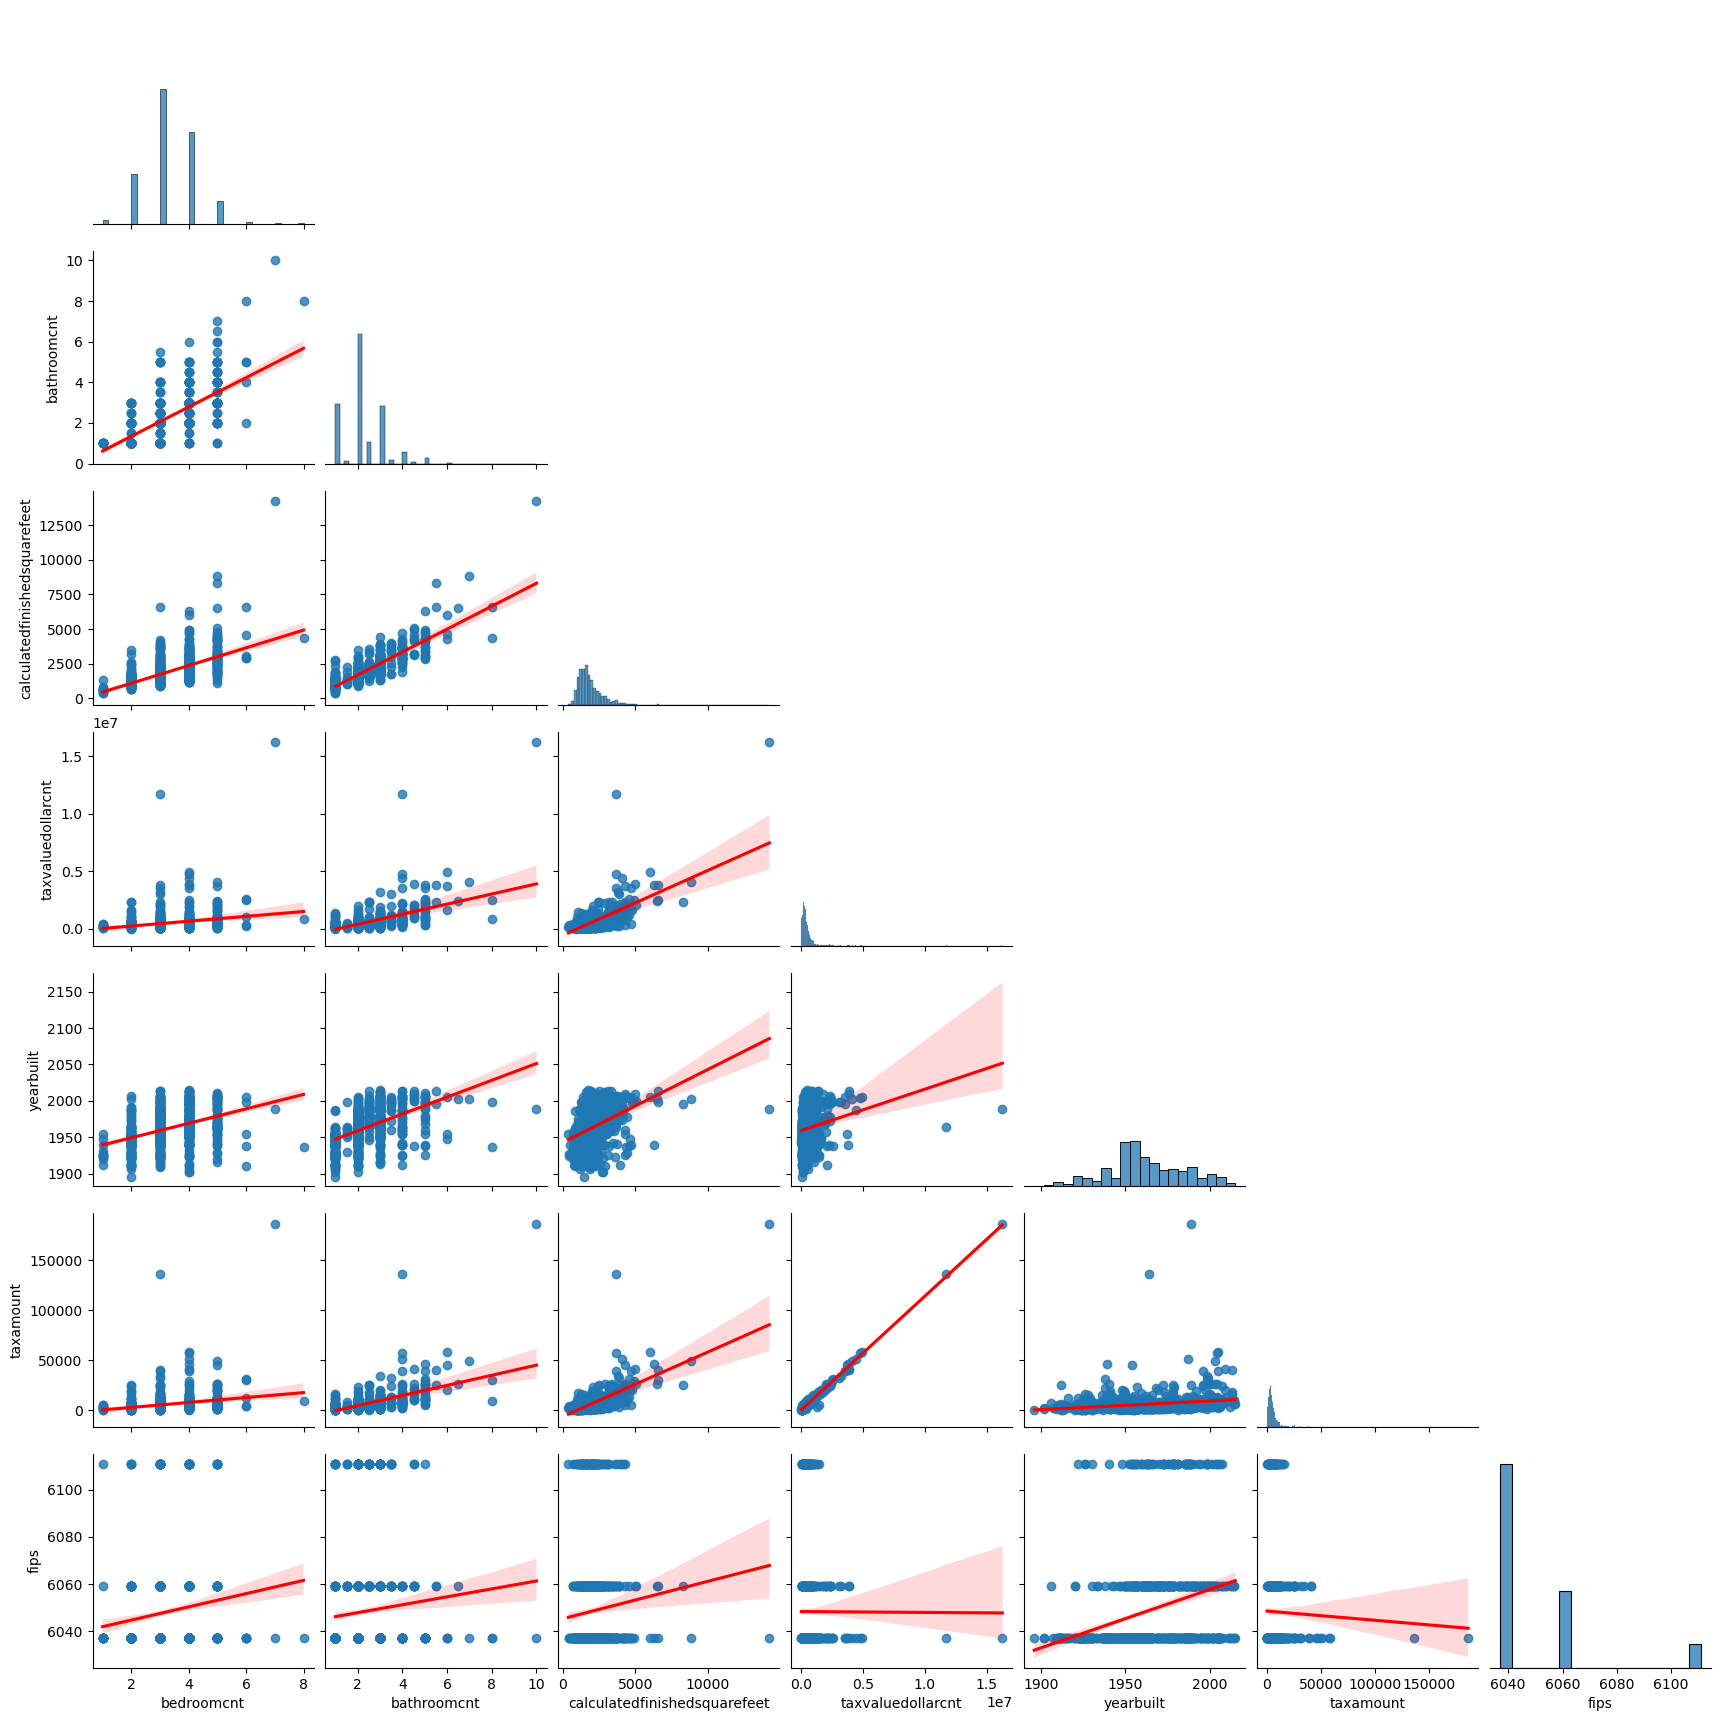

In [76]:
# Example usage:
plot_variable_pairs(train.sample(n=1000))


In [132]:
train.dtypes

bedroomcnt                      float64
bathroomcnt                     float64
calculatedfinishedsquarefeet    float64
taxvaluedollarcnt               float64
yearbuilt                       float64
taxamount                       float64
fips                            float64
dtype: object

In [133]:
train.select_dtypes(include='number').columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips'],
      dtype='object')

In [134]:
cat_columns = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_and_continuous_vars(df, cat_columns, cont_columns):
    """
    Plot three different plots for visualizing the relationship between a categorical variable and a continuous variable.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - cat_columns (list): List of categorical column names.
    - cont_columns (list): List of continuous column names.

    Returns:
    - None (displays plots).
    """

    # Loop through each categorical column
    for cat_col in cat_columns:

        # Loop through each continuous column
        for cont_col in cont_columns:

            # Create a box plot
            plt.figure(figsize=(12, 6))
            sns.boxplot(x=cat_col, y=cont_col, data=df)
            plt.title(f'{cont_col} by {cat_col}')
            plt.show()

            # Create a violin plot
            plt.figure(figsize=(12, 6))
            sns.violinplot(x=cat_col, y=cont_col, data=df)
            plt.title(f'{cont_col} by {cat_col}')
            plt.show()

            # Create a swarm plot
            plt.figure(figsize=(12, 6))
            sns.swarmplot(x=cat_col, y=cont_col, data=df)
            plt.title(f'{cont_col} by {cat_col}')
            plt.show()

# Example usage:
# Assuming 'your_dataframe' is your actual DataFrame, and 'cat_columns' and 'cont_columns' are your actual column lists.
plot_categorical_and_continuous_vars(your_dataframe, cat_columns, cont_columns)


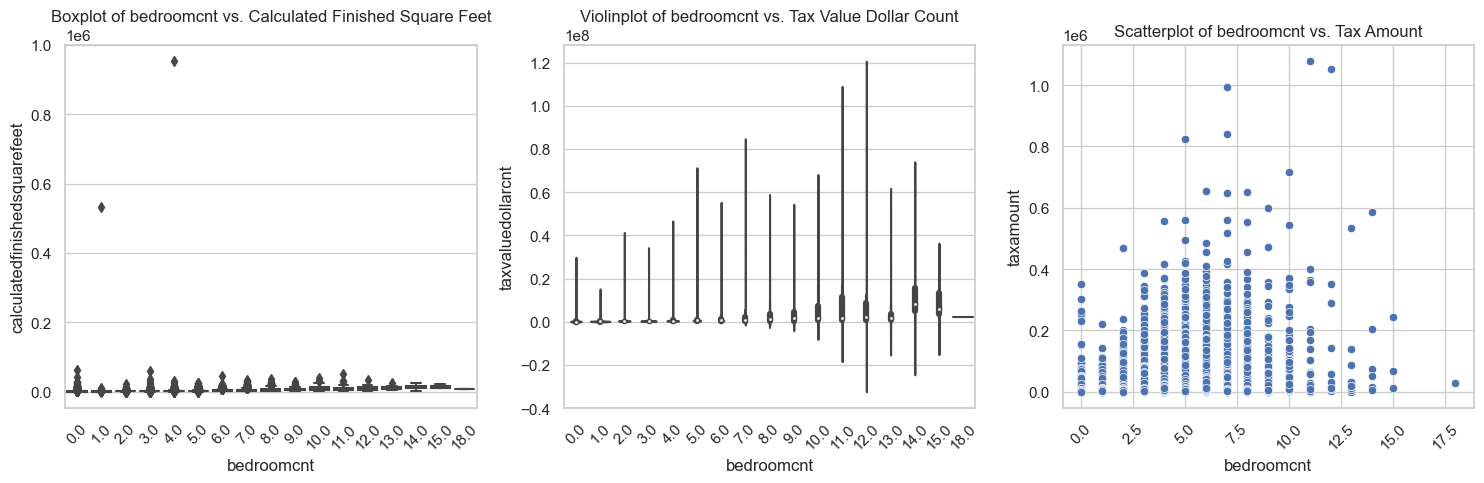

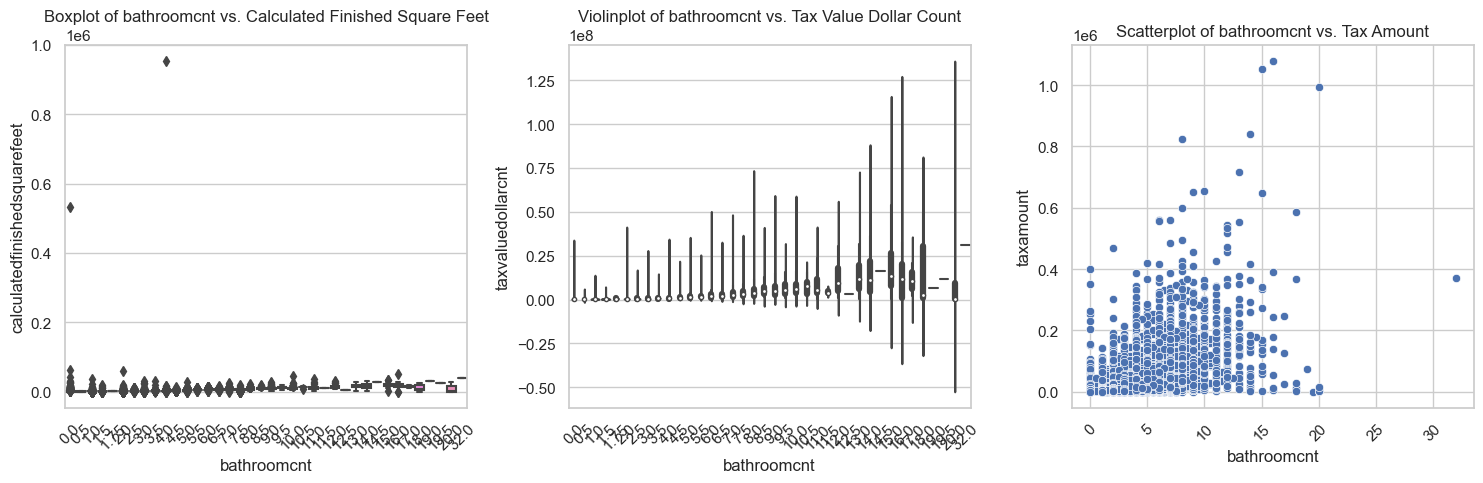

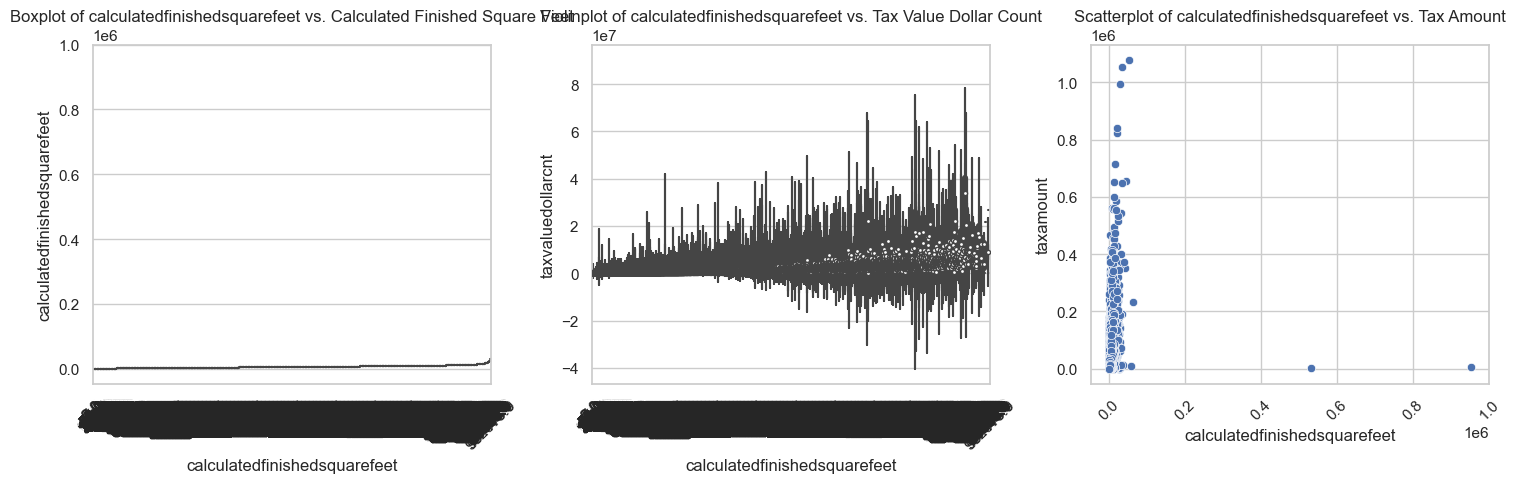

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x135293240> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x17b7fcfe0> (for post_execute):


KeyboardInterrupt: 

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_vars(df, cat_columns):
    """
    Plot three different visualizations for each categorical variable with continuous variables.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - cat_columns (list): List of categorical column names.

    Returns:
    - None (displays plots).
    """

    # Set the style for seaborn plots
    sns.set(style="whitegrid")

    # Iterate through each categorical column
    for cat_column in cat_columns:

        # Create a grid of subplots
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

        # Plot 1: Boxplot
        sns.boxplot(x=cat_column, y='calculatedfinishedsquarefeet', data=df, ax=axes[0])
        axes[0].set_title(f'Boxplot of {cat_column} vs. Calculated Finished Square Feet')
        axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

        # Plot 2: Violinplot
        sns.violinplot(x=cat_column, y='taxvaluedollarcnt', data=df, ax=axes[1])
        axes[1].set_title(f'Violinplot of {cat_column} vs. Tax Value Dollar Count')
        axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

        # Plot 3: Scatterplot
        sns.scatterplot(x=cat_column, y='taxamount', data=df, ax=axes[2])
        axes[2].set_title(f'Scatterplot of {cat_column} vs. Tax Amount')
        axes[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

        # Adjust layout
        plt.tight_layout()
        
        

        # Display the plots
        plt.show()

# Example usage:
# Assuming 'your_dataframe' is your actual DataFrame and 'cat_columns' is your list of categorical columns
plot_categorical_and_continuous_vars(train, cat_columns)

Text(0.5, 1.0, 'Yearbuilt vs. Tax Amount')

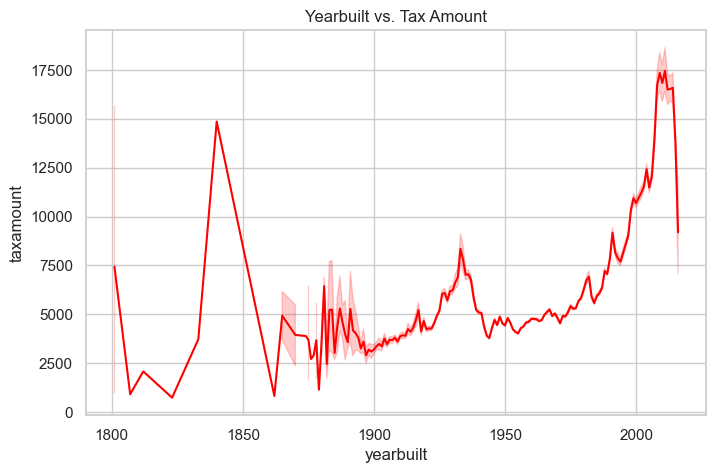

In [155]:
 # Plot 3: Scatterplot
plt.figure(figsize=(8,5))
sns.lineplot(x='yearbuilt', y='taxamount', data=train, color='red')
plt.title(f'Yearbuilt vs. Tax Amount')

#sns.lineplot(data=df, x='x_var', y='y_var', hue='group_var', palette=['red', 'blue'])


In [138]:
cat_columns

['bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'taxvaluedollarcnt',
 'yearbuilt',
 'taxamount',
 'fips']

Text(0.5, 1.0, 'Yearbuilt vs. Bathrm Cnt')

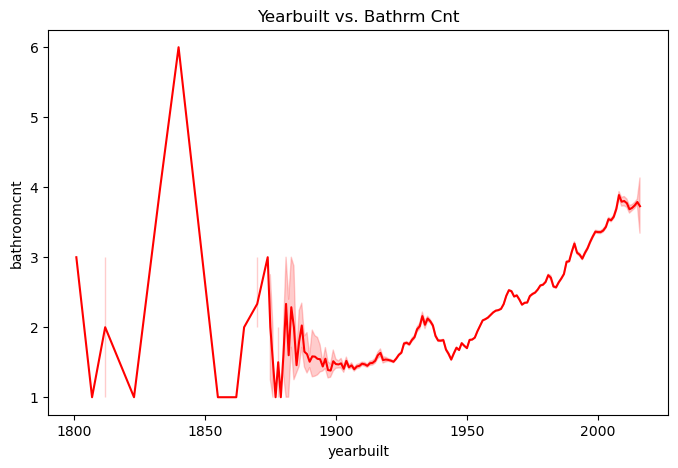

In [45]:
 # Plot 3: Scatterplot
plt.figure(figsize=(8,5))
sns.lineplot(x='yearbuilt', y='bathroomcnt', data=train, color='red')
plt.title(f'Yearbuilt vs. Bathrm Cnt')

#sns.lineplot(data=df, x='x_var', y='y_var', hue='group_var', palette=['red', 'blue'])


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


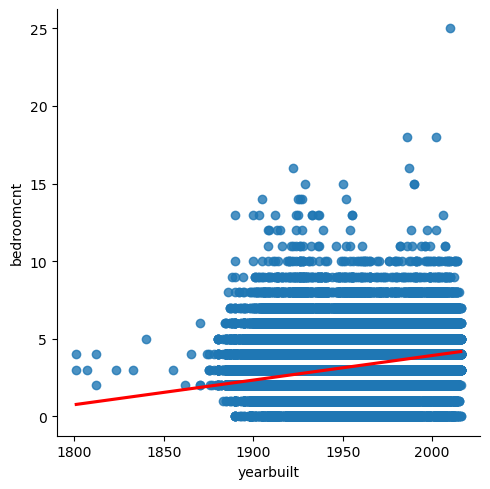

In [64]:
import seaborn as sns

sns.lmplot(data=train, x='yearbuilt', y='bedroomcnt', line_kws={'color': 'red'})
plt.show()


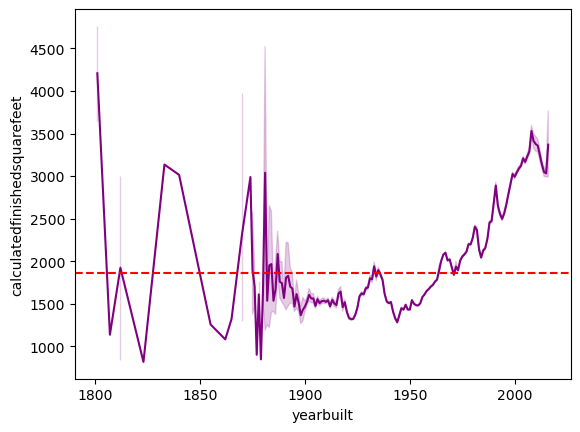

In [79]:
sns.lineplot(data=train, x='yearbuilt', y='calculatedfinishedsquarefeet', color='purple')

plt.axhline(y=train.calculatedfinishedsquarefeet.mean(), color='red', linestyle='--', label='Mean Bedroom Count')


# Show the plot
plt.show()

In [ ]:
#Turning floats into int

make_ints = ['bedrooms', 'area', 'taxvalue', 'yearbuilt', 'county']

for i in make_ints:
    df[i] = df[i].astype(int)
    
    return df

In [ ]:
df.dtypes

In [ ]:
df.county = df.county.map({6037: 'LA', 6059: 'Orange', 6111: 'Ventura'})

df.county.value_counts()

In [ ]:
for i in df.columns:   #columns are values from df
    print(col)
    sns.boxplot(data=df. x=col)
    plt.show

In [ ]:
taxamount, calculatedfinishedsquarefeet

In [78]:
from scipy.stats import pearsonr

# Assuming 'df' is your DataFrame
variable1 = train['calculatedfinishedsquarefeet']
variable2 = train['taxamount']

# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(variable1, variable2)

# Set your alpha level (e.g., 0.05)
alpha = 0.05



# Check if the p-value is less than alpha
if p_value < alpha:
    print(f"There is a significant correlation (p-value: {p_value:.4f}, alpha: {alpha})")
else:
    print(f"There is no significant correlation (p-value: {p_value:.4f}, alpha: {alpha})")

    

There is a significant correlation (p-value: 0.0000, alpha: 0.05)


In [61]:
from scipy.stats import pearsonr

def perform_pearson_correlation_test(dataframe, variable1_name, variable2_name, alpha=0.05):
    """
    Perform a Pearson correlation test between two continuous variables.

    Parameters:
    - dataframe (pd.DataFrame): Input DataFrame.
    - variable1_name (str): Name of the first continuous variable.
    - variable2_name (str): Name of the second continuous variable.
    - alpha (float): Significance level (default is 0.05).

    Returns:
    - tuple: Tuple containing the correlation coefficient and the p-value.
    - str: Result of the significance test.
    """

    # Extract the variables from the DataFrame
    variable1 = train['yearbuilt']
    variable2 = train['calculatedfinishedsquarefeet']

    # Perform Pearson correlation test
    correlation_coefficient, p_value = pearsonr(variable1, variable2)

    # Check if the p-value is less than alpha
    if p_value < alpha:
        result = f"There is a significant correlation (p-value: {p_value:.4f}, alpha: {alpha})"
    else:
        result = f"There is no significant correlation (p-value: {p_value:.4f}, alpha: {alpha})"

    return (correlation_coefficient, p_value), result

# Example usage:
# Assuming 'your_dataframe' is your actual DataFrame and 'variable1'/'variable2' are your column names
result, test_result = perform_pearson_correlation_test(train, 'variable1', 'variable2')

# Display the results
print(f"Correlation Coefficient: {result[0]:.4f}")
print(f"P-Value: {result[1]:.4f}")
print(test_result)


Correlation Coefficient: 0.3328
P-Value: 0.0000
There is a significant correlation (p-value: 0.0000, alpha: 0.05)


In [ ]:
from scipy.stats import pearsonr

def perform_pearson_correlation_test(dataframe, variable1_name, variable2_name, alpha=0.05):
    """
    Perform a Pearson correlation test between two continuous variables.

    Parameters:
    - dataframe (pd.DataFrame): Input DataFrame.
    - variable1_name (str): Name of the first continuous variable.
    - variable2_name (str): Name of the second continuous variable.
    - alpha (float): Significance level (default is 0.05).

    Returns:
    - tuple: Tuple containing the correlation coefficient and the p-value.
    - str: Result of the significance test.
    """

    # Extract the variables from the DataFrame
    variable1 = train['yearbuilt']
    variable2 = train['calculatedfinishedsquarefeet']

    # Perform Pearson correlation test
    correlation_coefficient, p_value = pearsonr(variable1, variable2)

    # Check if the p-value is less than alpha
    if p_value < alpha:
        result = f"There is a significant correlation (p-value: {p_value:.4f}, alpha: {alpha})"
    else:
        result = f"There is no significant correlation (p-value: {p_value:.4f}, alpha: {alpha})"

    return (correlation_coefficient, p_value), result

# Example usage:
# Assuming 'your_dataframe' is your actual DataFrame and 'variable1'/'variable2' are your column names
result, test_result = perform_pearson_correlation_test(train, 'variable1', 'variable2')

# Display the results
print(f"Correlation Coefficient: {result[0]:.4f}")
print(f"P-Value: {result[1]:.4f}")
print(test_result)
